<a id='top'></a>

# Homework 2: Introduction to Probability and Simulation 
***

**Name**: 

***

This assignment is due on Canvas by **5 PM on Friday February 15**. Your solutions to theoretical questions should be done in Markdown directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.

**NOTES**: 

- Any relevant data sets should be available under the **Data** module on Canvas, as well as in the zipped folder in which you obtained this assignment. To make life easier on the graders if they need to run your code, do not change the relative path names here. Instead, move the files around on your computer.
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Remember that there is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked on Canvas on writing math in Markdown. **All** of your written commentary, justifications and mathematical work should be in Markdown.
- Because you can technically evaluate notebook cells in a non-linear order, it's a good idea to do Kernel $\rightarrow$ Restart & Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p3) | [Problem 4](#p4)

---

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

***
<a/ id='p1'></a>
[Back to top](#top)

### [30 points] Problem 1

Courtney, Nick and Jarrod are playing special version of <a href="https://en.wikipedia.org/wiki/Monopoly_(game)">Monopoly</a>. Because the three of them are all scoundrels, they are all currently in Jail. In Monopoly, players roll two 6-sided dice on their turn. In their version of Monopoly, however, to get out of Jail, a player must roll *doubles* (the two dice have the same outcome) and must keep re-rolling the dice until they get doubles during their first turn in Jail. As soon as a player rolls doubles, they are let out of Jail and their turn ends. Let $D$ represent the event that a player rolls doubles.

Work the following problems by hand unless otherwise stated (but don't be afraid to simulate to check your result!). It is okay to use Python as a calculator, of course.

**Part A**: What is the probability that a player will roll doubles on their first, second, or third roll while in jail? Note that if a player rolls doubles on their third roll, for example, then they must *not* have rolled doubles on either of the first two rolls. Keep 4 decimal places in your answer.

**Solution:**

A player can rolls doubles on the first, second or third roll, and these events are disjoint. So $P(D) = P(\text{first roll}) + P(\text{second roll}) + P(\text{third roll})$

The probability of rolling doubles on any given roll is $P(D) = 6/36 = \dfrac{1}{6}$

$P(\text{first roll}) = \dfrac{1}{6}$

$P(\text{second roll}) = P(\text{doubles on second roll}) \times P(\text{not doubles on first roll}) = \dfrac{1}{6} \cdot \dfrac{5}{6}$

$P(\text{third roll}) = P(\text{doubles on third roll}) \times P(\text{not doubles on first or second roll}) = \dfrac{1}{6} \cdot \left(\dfrac{5}{6}\right)^2$

$\longrightarrow P(D) = \dfrac{1}{6} + \dfrac{1}{6}\cdot \dfrac{5}{6} + \dfrac{1}{6}\cdot \left(\dfrac{5}{6}\right)^2 = \fbox{$0.4213$}$

In [10]:
pD = 1/6
print("P(D)={:0.4f}".format(pD*(1+(1-pD)+(1-pD)**2)))

P(D)=0.4213


**Part B:** *The plot thickens!* Darth Ketelsen is well-known to meddle in Jedi affairs. Did I mention that Courtney, Nick and Jarrod are all in Computer Science Jedi training? That's not important for this problem, but it is interesting. 

Turns out, Darth Ketelsen will occasionally secretly swap out the dice in the Jedi's Monopoly game for a pair of dice that have been weighted. Each of Darth Ketelsen's two dice is weighted such that a 6 is rolled with probability $1/2$, and all the other numbers are equally likely to be rolled. If Darth Ketelsen switches the dice for her weighted ones, she does so before the game begins, and the entire game of Monopoly is played with the same pair of dice, whether they are fair or weighted.

What is the probability of rolling doubles on the first, second or third roll while in jail, using Darth Ketelsen's weighted dice? Again, keep 4 decimal places in your answer.

**Solution:**

Again, $P(D) = P(\text{first roll}) + P(\text{second roll}) + P(\text{third roll})$

The probability of rolling a 6 is $0.5$, so the probability of obtaining doubles via 6s is $1/2 \times 1/2 = \dfrac{1}{4}$.

The probability of rolling a 1-5 is $\dfrac{1/2}{5} = \dfrac{1}{10}$

So, the probability of rolling doubles via a pair of 1s, 2s, 3s, 4s or 5s is $(1/10)^2 = \dfrac{1}{100}$ each.

Thus, now the probability of rolling doubles on any given roll is $P(D) = 1/4 + 5\times 1/100 = \dfrac{1}{4} + \dfrac{1}{20} = \dfrac{6}{20} = \dfrac{3}{10}$

$P(\text{first roll}) = \dfrac{3}{10}$

$P(\text{second roll}) = P(\text{doubles on second roll}) \times P(\text{not doubles on first roll}) = \dfrac{3}{10} \cdot \dfrac{7}{10}$

$P(\text{third roll}) = P(\text{doubles on third roll}) \times P(\text{not doubles on first or second roll}) = \dfrac{3}{10} \cdot \left(\dfrac{7}{10}\right)^2$

$\longrightarrow P(D) = \dfrac{3}{10} + \dfrac{3}{10}\cdot \dfrac{7}{10} + \dfrac{3}{10}\cdot \left(\dfrac{7}{10}\right)^2 = \fbox{$0.6570$}$

In [11]:
pD = 3/10
print("P(D)={:0.4f}".format(pD*(1+(1-pD)+(1-pD)**2)))

P(D)=0.6570


**Part C:** Suppose that before any given game of Monopoly, Darth Ketelsen replaces the normal six-sided dice with her loaded dice with probability $0.25$. Then the players proceed to play their entire game using either the loaded dice, or the fair dice.  It is unknown to the player who is rolling, however, whether they are using the unfair or fair dice. What is the probability that a player gets doubles within three rolls? Keep 4 decimal places in your answer.

**Solution**:

Let $D$ represent the event that a player rolls doubles within three turns, let $F$ represent the event that the padawans are playing with fair dice, and let $U$ represent the event that they are playing with unfair dice.

$\begin{align*}
P(D) &= P(D \mid F)P(F) + P(D \mid U) P(U) \\
&= 0.4213 \cdot 0.75 + 0.6570 \cdot 0.25 \\
&\approx \fbox{$0.4802$}
\end{align*}$

In [12]:
pD = 1/6
pD_fair = pD*(1+(1-pD)+(1-pD)**2)

pD = 3/10
pD_unfair = pD*(1+(1-pD)+(1-pD)**2)

p_unfair = 0.25
pD_total = pD_fair*(1-p_unfair) + pD_unfair*p_unfair
print("pD_total={:0.4f}".format(pD_total))

pD_total=0.4802


In [13]:
# Check that answer with rounded-off values is consistent:
.4213*.75 + .6570*.25

0.480225

**Part D:** While it is unknown whether they are playing with Darth Ketelsen's unfair dice, or with fair dice, Courtney, Jarrod and Nick are armed and dangerous... with *probability theory*, that is! Well, probability theory and lightsabers.

Suppose that starting from jail, all three of Courtney, Jarrod and Nick have taken one turn, and all three of them have managed to roll doubles within 3 rolls. If you were not given this information, you would assume that there is a probability of $0.25$ that they are playing with Darth Ketelsen's unfair dice. But now, given this information, what is the probability that they are playing with the unfair dice?

**Solution:**

We want to find the probability that they are playing with the unfair dice, given that 3 out of 3 players have all rolled doubles within 3 rounds. Call this event $D_3$, and call the event that they are playing with the unfair dice $U$. So we are tasked with finding $P(U \mid D_3)$.

Note that the event "Jarrod rolls doubles within 3 rounds" is independent of the event "Courtney rolls doubles within 3 rounds" (for example). So $P(D_3 \mid U) = P(D_1 \mid U)^3$, where $P(D_1 \mid U)$ is the probability that just one player rolls doubles within 3 rounds (the answer from Part B).

We use Bayes' Theorem and the Law of Total Probability:

$\begin{align*}
  p(U \mid D_3) &= \dfrac{p(D_3 \mid U)p(U)}{p(D_3)} \\
                &= \dfrac{p(D_1 \mid U)^3 p(U)}{p(D_1 \mid U)^3p(U) + p(D_1 \mid F)^3p(F)} \\
                &= \dfrac{0.6570^3 \cdot 0.25}{0.6570^3 \cdot 0.25 + .4213^3 \cdot .75} \\
                &\approx \fbox{$0.5583$}
 \end{align*}$

In [14]:
pD = 1/6
pD_fair = pD*(1+(1-pD)+(1-pD)**2)

pD = 3/10
pD_unfair = pD*(1+(1-pD)+(1-pD)**2)

p_unfair = 0.25
n = 3

p_unfair_D3 = (pD_unfair**n)*p_unfair/((pD_fair**n)*(1-p_unfair) + (pD_unfair**n)*p_unfair)

print("P(Unfair|D3)={:0.4f}".format(p_unfair_D3))

P(Unfair|D3)=0.5583


In [15]:
# Check that answer with rounded-off values is consistent:
(.6570**3)*.25 / ((.6570**3)*.25 + (.4213**3)*.75)

0.558334209737698

**Part E**:  First, work out **by hand** a formula for the probability in general that Courtney, Jarrod and Nick are playing with Darth Ketelsen's unfair dice, given that $n$ players in a row have gotten out of jail by rolling doubles within 3 rounds. That is, you want to find a formula for $P(U \mid D_n)$ in terms of $n$.

Then, define a function `prob_unfair` to calculate $P(U \mid D_n)$.  This function should only take one positive integer argument, $n$.

Verify that your function is performing as expected by checking your answer to **Part D** by plugging in $n=3$.

**Solution**:

We can generalize our answer by simply replacing the $3$ in Part D's answer formula with $n$:

$\begin{align*}
  p(U \mid D_n) &= \dfrac{0.6570^n \cdot 0.25}{0.6570^n \cdot 0.25 + .4213^n \cdot .75} \\
 \end{align*}$

In [16]:
def prob_unfair(n):
    return (pD_unfair**n)*p_unfair/((pD_fair**n)*(1-p_unfair) + (pD_unfair**n)*p_unfair)

# Verification of Part D answer:
prob_unfair(3)

0.5583407133594115

**Part F:**  What is the smallest value of $n$ players in a row rolling doubles within 3 rounds that would lead to a higher-than-90% probability that the dice are unfair?  Plugging larger and larger values for $n$ into your `prob_unfair` function is a very reasonable way to check this.

In [17]:
[(n,prob_unfair(n)) for n in range(1,12)]

[(1, 0.34202915316982874),
 (2, 0.4477126116049228),
 (3, 0.5583407133594115),
 (4, 0.6634659662977048),
 (5, 0.7545680810684907),
 (6, 0.8274231452894563),
 (7, 0.8820326514381407),
 (8, 0.9210113971568145),
 (9, 0.9478719623361006),
 (10, 0.965936251605081),
 (11, 0.9778866390520378)]

**Solution:** $n=8$ is large enough for us to say there's at least a 90% probability they are playing with unfair dice.

**Part G:** Jarrod, Courtney and Nick are becoming suspicious that the dice they are playing with are unfair. They decide to keep track of how frequently each player rolls doubles. They will roll the dice `n_trials` number of times, and make a plot of their running estimate of the probability of rolling doubles, from the moment they start rolling until they finally finish all `n_trials` rolls. So, the x-axis of their plot will be the number of rolls, and the y-axis will be the running estimate of the probability of rolling doubles with the given dice, with the number of trials given by the x-axis.

Write code to run 4 independent simulations of 1,000 trials each to estimate the probability of rolling doubles using the fair dice, and another 4 independent simulations to estimate the probability of rolling doubles using Darth Ketelsen's loaded dice, and plot their running estimate curves on the same set of axes. 

In order to more easily distinguish between the loaded dice estimates and the fair dice estimates, plot the loaded dice estimates as lines using the color `tomato` and plot the fair dice estimates using the color `seagreen`. Be sure to label your axes and include a legend.

Finally, comment on how many flips appear to be necessary before Jarrod, Courtney and Nick might become convinced of what type of dice they are playing with (fair or unfair). Justify your answer fully using your figure.

In [18]:
die_fair = {1 : 1/6, 2 : 1/6, 3 : 1/6, 4 : 1/6, 5 : 1/6, 6 : 1/6}
die_unfair = {1 : 1/10, 2 : 1/10, 3 : 1/10, 4 : 1/10, 5 : 1/10, 6 : 1/2}

n_trials = 1000
n_sim = 4

In [19]:
def doubles_sim(die, n_trials):
    roll1 = np.random.choice(list(die.keys()), p=list(die.values()), size=n_trials)
    roll2 = np.random.choice(list(die.keys()), p=list(die.values()), size=n_trials)
    doubles = roll1==roll2
    return doubles.cumsum()/np.arange(1,n_trials+1)

In [20]:
p_running_fair, p_running_unfair = [], []
for _ in range(n_sim):
    p_running_fair.append(doubles_sim(die_fair, n_trials))
    p_running_unfair.append(doubles_sim(die_unfair, n_trials))

IndexError: list index out of range

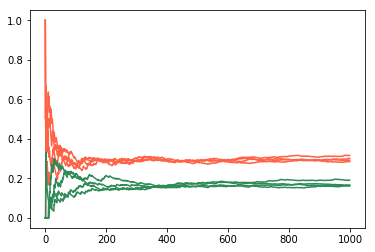

In [25]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7,5))
for k in range(n_sim):
    if k==1:
        plt.plot(p_running_unfair[k], color='tomato', label='unfair dice')
        plt.plot(p_running_fair[k], color='seagreen', label='fair dice')
    else:
        plt.plot(p_running_unfair[k], color='tomato')
        plt.plot(p_running_fair[k], color='seagreen')
ax.set_xlim([0,1000])
ax.set_ylim([0,1])
ax.set_xlabel('Number of rolls')
ax.set_ylabel('Estimate of probability of doubles')
ax.legend();

It appears to take about 100 flips for the two sets of simulations to clearly separate. So, after about 100 flips, the young Jedi are probably ready to make some conclusion about their type of dice.

***
<a/ id='p2'></a>
[Back to top](#top)

### [25 points] Problem 2

Sonic and Amy are two average hedgehogs who have to run around campus every day for classes and hobbies. When they leave the Engineering Center (E) from their Data Science class, they like to go to 5 other places on campus: the Gym ($G~$) to exercise, the Library ($L~$) to learn, the Hill ($H~$) to grab a sandwich, Weathertech Cafe ($W~$) for a pizza, and the mountains ($M~$) to frolic with their marmot friends.

Here are some rules governing their movements throughout the fair city of Boulder:
* When Sonic and/or Amy is leaving one location, they randomly select one of the available adjacent locations, with equal probability.
* This includes back-tracking, but note that to return to their original location would require 2 moves.
* Assume that all moves require the same amount of time.
* They are also not allowed to stay put; they always must move to some *other* adjacent location.
* Sonic and Amy also act **independently** of one another. That is, the probability that Sonic goes from one place to another is independent of Amy's movements.

<img src="http://www.cs.colorado.edu/~tonyewong/home/resources/sonic_and_amy_statespace.png" style="width: 300px;"/>

**Part A**: Amy is currently at the Gym and she has worked up quite an appetite! She wants to go to either the Hill or the Weathertech Cafe, and is soooooooo hungry that she must land on exactly the $H$ or $W$ node in exactly one or two moves. Compute (by hand) the probability that Amy ends up at the the Hill ($H$) or the Weathertech Cafe ($W$) in exactly one or two moves, given that she is starting from the Gym ($G$). 

**Solution**:

Let $H_1$ and $H_2$ be the events that Amy goes to the Hill $H$ as her first or second location. Similarly, let $W_1$ and $W_2$ be the events that Amy goes to the Weathertech Cafe as her first or second location, respectively, and let
$E_1$, $L_1$, $G_1$ and $M_1$ be the events that Amy goes to the Engineering Center, Library, Gym and Mountains as her first location.  Yes, Amy cannot actually go to some of these places in 1 step, and cannot get to the Hill or Weathertech Cafe from some of them in 1 step either, so a bunch of probabilities we write down are going to end up being 0.

We want to calculate the probability $P(H_1 \cup H_2 \cup W_1 \cup W_2)$, and these events are all disjoint, so we can break this up as $P(H_1) + P(H_2) + P(W_1) + P(W_2)$

On Amy's first step from the Gym, she can go to any of the Hill, Library or Engineering Center with equal probability, so $P(H_1) = 1/3$ and $P(W_1) = 0$.

Now for Amy's second step. We can use the Law of Total Probability (LTP) to map out all the possible ways she can arrive at the Hill in 2 steps:
$\begin{align*}
P(H_2) &= P(H_2 \mid G_1)P(G_1) &&+ P(H_2\mid W_1)P(W_1) &&+ P(H_2\mid M_1)P(M_1) &&+ P(H_2\mid L_1)P(L_1) &&+ P(H_2\mid H_1)P(H_1) &&+ P(H_2\mid E_1)P(E_1) \\
       &= (1/3) \cdot 0 &&+ 0 \cdot 0 &&+ 1 \cdot 0 &&+ (1/4) \cdot (1/3) &&+ 0\cdot (1/3) &&+ 0 \cdot (1/3) \\
       &= 1/12 \approx 0.08333
 \end{align*}$

Similarly, we can use the Law of Total Probability (LTP) to map out all the possible ways she can arrive at the Weathertech Cafe in 2 steps:
$\begin{align*}
P(W_2) &= P(W_2 \mid G_1)P(G_1) &&+ P(W_2\mid W_1)P(W_1) &&+ P(W_2\mid M_1)P(M_1) &&+ P(W_2\mid L_1)P(L_1) &&+ P(W_2\mid H_1)P(H_1) &&+ P(W_2\mid E_1)P(E_1) \\
       &= 0 \cdot 0 &&+ 0 \cdot 0 &&+ 0 \cdot 0 &&+ (1/4) \cdot (1/3) &&+ 0\cdot (1/3) &&+ (1/3) \cdot (1/3) \\
       &= 1/12 + 1/9 &&= 3/36 + 4/36 &&= 7/36 \approx 0.1944
 \end{align*}$

Now we add these all up:

$\begin{align*}
  P(H_1 \cup H_2 \cup W_1 \cup W_2) &= 1/3 + 0 + 1/12 + 7/36 \\
                                    &= 12/36 + 3/36 + 7/36 \\
                                    &=  \fbox{$22/36 = 11/18 = 0.6111$}
 \end{align*}$

**Part B**: Suppose that Amy is at the Gym and Sonic is working late at the Engineering Center. Later, they both leave and wander around, randomly and independently of one another, as described above.
1. What is the probability that they run into each other in the same location on the first location visited?  
2. Given their two initial locations, what is the probability that they meet at the Hill after 2 moves?

**Solution:**

**[1]**

They could run into each other at the first location visited in exactly one way:  at the Library. Let's use the same variable naming convention as in Parts A and B, but use capital letters for Amy's stops and lowercase letters for Sonic's stops.

So we want:
$$P(\text{meet at first stop}) = P(L_1 \cap l_1) $$

and since the two move independently of one another, this is
$$\begin{align*}
P(\text{meet at first stop}) &= P(L_1)P(l_1) \\
 &= \frac{1}{3} \cdot \frac{1}{3} \\
 &= \frac{1}{9} \approx 0.1111
 \end{align*}$$
 
**[2]**

For the two of them to both end up at the Hill after 2 moves, from independence, we have:
$$P(H_2 \cap h_2) = P(H_2)P(h_2)$$

So let's calculate $P(H_2)$ and $P(h_2)$, then multiply them together.

From the LTP, and leaving off terms we know will have 0 probability associated with them, for Amy we have:

$\begin{align*}
P(H_2) &= P(H_2 \mid L_1)P(L_1) \\
       &= \frac{1}{4} \cdot \frac{1}{3} \\
       &= \frac{1}{12} \approx 0.08333
\end{align*}$

And we do a similar calculation for Sonic:

$\begin{align*}
P(h_2) &= P(h_2 \mid g_1) P(g_1) + P(h_2 \mid l_1) P(l_1) \\
       &= \frac{1}{3} \cdot \frac{1}{3} + \frac{1}{4} \cdot \frac{1}{3} \\
       &= \frac{1}{9} + \frac{1}{12} \\ %4/36 + 3/36
       &= \frac{7}{36} \approx 0.1944
\end{align*}$

So, multiply these together to find:

$P(H_2 \cap h_2) = P(H_2) P(h_2) = \dfrac{1}{12} \cdot \dfrac{7}{36} = \fbox{$\dfrac{7}{432} \approx 0.01620$}$

**Part C**: Write a simulation to confirm that your by-hand calculations in **Parts A** and **B** are correct. Make sure you run your simulations for enough trials that your estimates are reasonably close to your analytic results. In addition to showing your code, you should explain in Markdown (not just in code comments) what your code is doing and why it is a reasonable approximation of the probabilities in **Parts A** and **B**.

**Solution:**

The `sim_walk` function takes the initial location of Amy or Sonic, the number of steps the hedgehog will take, and the adjacency graph for the states accessible from each state location, and will return a random location for the person to be in after `n_steps` steps.

Then, we can simulate a whole bunch of 1- or 2-step walks for Amy, starting from the Gym, and see what proportion of the time she ends up at either the Hill or the Weathertech Cafe (for Part A for example).

In [22]:
# Let's make a dictionary of the neighbors of each location 
graph = {"H":["G","L","M"],      # neighbors of H
         "G":["H","L","E"],      # neighbors of G
         "M":["H"],              # neighbors of M
         "L":["H","G","E","W"],  # neighbors of L
         "E":["W","L","G"],      # neighbors of E
         "W":["L","E"]}          # neighbors of W

def sim_walk(initial_location, n_steps, neighbors):
    location = initial_location
    for step in range(n_steps):
        # Choose a random location by using the neighbors graph!
        location = np.random.choice(neighbors[location])
    return location

So to verify our solution to **Part A**, we need to start Amy off at the Gym (G) and see how frequently the Hill (H) or the Weathertech Cafe (W) results after 1 or 2 steps.

In [23]:
n_sim = 100000
pr_H1 = np.array([sim_walk("G",1,graph)=="H" for kk in range(n_sim)]).sum()/n_sim
pr_H2 = np.array([sim_walk("G",2,graph)=="H" for kk in range(n_sim)]).sum()/n_sim
pr_W1 = np.array([sim_walk("G",1,graph)=="W" for kk in range(n_sim)]).sum()/n_sim
pr_W2 = np.array([sim_walk("G",2,graph)=="W" for kk in range(n_sim)]).sum()/n_sim
print(pr_H1 + pr_H2 + pr_W1 + pr_W2)

0.60921


That's pretty close to our analytical result of about 0.6111. Woohoo!

For the 1-step meeting probability for **Part B**, let's start Sonic off at the Engineering Center and start Amy off at the Gym, move them each 1 step, and see how frequently they end up in the same place.

In [24]:
n_sim = 1000000
sonic  = np.array([sim_walk("E",1,graph) for kk in range(n_sim)])
amy = np.array([sim_walk("G",1,graph) for kk in range(n_sim)])
print(np.sum(sonic==amy)/n_sim)

0.111248


That's pretty close to our analytical result of $1/9$ ($0.1111$).  Yippee-dippee!

Finally, for the 2-step meeting probability at the Hill of **Part B**, we do a similar thing but with 2 steps.

In [25]:
n_sim = 1000000
sonic   = np.array([sim_walk("E",2,graph) for kk in range(n_sim)])
p_sonic = np.sum(sonic=="H")/n_sim
amy     = np.array([sim_walk("G",2,graph) for kk in range(n_sim)])
p_amy   = np.sum(amy=="H")/n_sim
print(p_sonic*p_amy)

0.016133091134


That's pretty darn close the our analytical result of about 0.01620. Yehoot!

**Part D:** Use your simulation from Part C, possibly with some modification, to estimate the **long-run proportion of time that the hedgehogs spend in the mountains**. You can estimate this using the following technique:
* walk a hedgehog around the graph for a very large number of steps (at least 100,000 steps), 
* keep track of which location the hedgehog is at, at each step, then
* the proportion of their time spent at any given location may be estimated as the number of times they are at the Mountains node ($M$), divided by the total number of steps.

You may be left wondering: Where should I start my hedgehog? That is very weird question, but totally valid here! It turns out that **it should not matter** where you start the hedgehog. Verify this by making your estimate from three different starting locations. Be sure to include some commentary in Markdown to state your answer for the long-run proportion of time that the hedgehogs spend in the mountains, and comment on whether it appears to depend on the initial location.

In [26]:
def long_walk(init_loc, n_steps, graph):
    # initialize a list of all the hedgehog's stops
    stops = [init_loc]
    for _ in range(n_steps):
        # step the hedgehog forward 1 step and append new location to end of `stops`
        stops.append(sim_walk(stops[-1],1,graph))
    return np.array(stops)

In [27]:
n_steps = 100000

initial = "E"
stops = long_walk(initial, n_steps, graph)
pM = np.sum(stops=="M")/n_steps
print("Mountain time starting from {} is {:0.4f}".format(initial,pM))

initial = "L"
stops = long_walk(initial, n_steps, graph)
pM = np.sum(stops=="M")/n_steps
print("Mountain time starting from {} is {:0.4f}".format(initial,pM))

initial = "W"
stops = long_walk(initial, n_steps, graph)
pM = np.sum(stops=="M")/n_steps
print("Mountain time starting from {} is {:0.4f}".format(initial,pM))

Mountain time starting from E is 0.0635
Mountain time starting from L is 0.0627
Mountain time starting from W is 0.0595


The hedgehogs spend about 6.2% of their time in the mountains. I verified this by starting from the Engineering Center, the Library and the WeatherTech Cafe, and got about the same answer. Yahoo!

***
<a/ id='p3'></a>
[Back to top](#top)

### [20 points] Problem 3  

After years of Computer Science Jedi training, Tony has attained the rank of Master is training two aspiring young apprentices: Nick and Courtney. For their training and Tony’s amusement, Nick and Courtney are having a lightsaber duel with the following rules:
* The duel is composed of a number of rounds.
* Each round consists of Nick trying to strike Courtney with his lightsaber, then Courtney trying to strike Nick with her lightsaber.
* If Nick strikes Courtney, then he is awarded a point. Similarly, if Courtney strikes Nick, then she is also awarded a point.
* If a round ends in a tie (i.e., either both strike each other or both miss), then Nick and Courtney proceed to another round. If a round ends with one apprentice scoring a point but the other does not, then the apprentice who scored a point wins the duel.

Let $C$ be the event that "Courtney wins the duel", $E$ be the event that "the duel ends after the first round of lightsaber strikes", and $R$ be the event that "the duel continues after the first round of lightsaber strikes".  Suppose that the result of any given lightsaber strike is independent of the other strikes, Courtney successfully lands her lightsaber strikes with probability $p$, and Nick lands his strikes with probability $q$.

**Part A**: The duel will continue until Courtney or Nick wins.  What is the sample space $\Omega$ for this "experiment"?  Represent the outcomes of individual lightsaber strikes by $H$ for a hit and $M$ for a miss, and assume that Courtney has the first strike in each round. At the very least, your answer should include all of the events in $\Omega$ that include one or two rounds, followed by "..." to show that you have established a pattern.

**Solution**: 

$$
\Omega = \{HM, MH, HHHM, HHMH, MMHM, MMMH, \ldots \}
$$

**Part B**: Determine $P(C \mid E)$ in terms of $p$ and $q$.

**Solution**:

We have 

$$
P(C \mid E) = \frac{P(C \cap E)}{P(E)} = \frac{P(\{HM\})}{P(\{HM, MH\})} = \frac{p(1-q)}{p(1-q) + (1-p)q} = \frac{p(1-q)}{p + q -2pq}
$$

**Part C**: Explain in words why events $C$ and $R$ should be independent. 

**Solution**:

We have many tests for independence that we could employ, mathematically. In words, however, the probability that Courtney wins and the probability that the duel is continues after the first round *must* be independent. Each round of the duel begins with the two Jedi tied, and takes place identically, regardless of what score Courtney and Nick are tied at. (5 to 5 is the same as 10 to 10). So Courtney's probability of winning beginning on round 1 versus her probability of winning beginning on round 5 (after 4 tied rounds) must be the same. In symbols, that means
$$P(C \mid R) = P(C)$$
which means they are independent.

**Part D**: Use the Law of Total Probability to show that $P(C) = p(1-q) + (2pq - p - q +1) P(C \mid R)$. 

**Solution**: 

We'll use the Law of Total Probability and condition on the events that the duel ends and that the duel remains tied after the first round. 

\begin{eqnarray}
\nonumber P(C) &=& P(C \mid E)P(E) + P(C \mid R)P(R)  \\
\\
\nonumber  &=& P(C \mid E)P(\{HM, MH\}) + P(C \mid R)P(\{HH, MM\})  \\
\\
\nonumber  &=& \frac{p(1-q)}{p + q -2pq} P(\{HM, MH\}) + P(C \mid R)P(\{HH, MM\})  \quad \left[\textrm{From }\textbf{Part A}\right] \\
\\
\nonumber  &=& \frac{p(1-q)}{p + q -2pq} \left[P(HM)+ P(MH))\right] + P(C \mid R)\left[P(HH) + P(MM)   \right] \\
\\
\nonumber  &=& \frac{p(1-q)}{p + q -2pq} \left[p(1-q)+ (1-p)q\right] + P(C \mid R)\left[pq + (1-p)(1-q)   \right] \\
\\
\nonumber  &=& \frac{p(1-q)}{p + q -2pq} \left[p + q - 2pq\right] + P(C \mid R)\left(2pq - p - q +1 \right) \\
\\
\nonumber  &=& p(1-q) + P(C \mid R)\left(2pq - p - q +1 \right) \quad \checkmark \\
\end{eqnarray}


**Part E**: Use **Part D** and the fact from **Part C** that events $C$ and $R$ are independent to determine $P(C)$ in terms of $p$ and $q$. 

**Solution**: 

We'll use the Law of Total Probability and condition on the events that the duel ends and that the duel remains tied after the first round. 

Part D tells us:
$$P(C) = p(1-q) + P(C \mid R)\left(2pq - p - q +1 \right)$$

And Part C (independence of $C$ and $R$) tells us:
$$P(C \mid R) = P(C)$$

Put them together.
$$P(C) = p(1-q) + P(C)\left(2pq - p - q +1 \right)$$

Solve algebraically for $P(C)$.
$$P(C) \left [1- \left(2pq - p - q +1 \right) \right ]= p(1-q)$$

Cancel the 1 and -1, and solve.
$$P(C) = \frac{p(1-q)}{-2pq + p + q }$$


**Part F**: Explain why the answers to **Part B** and **Part E** are the same. 

**Solution**:

If there is no winner, it is as if the whole dueling process restarts anew. The duel has  no memory of previous rounds. Thus, the total probability that Courtney wins must be the same as the probability that Courtney wins in just one round, including in the first one.

Therefore, $P(C) = P(C \mid R)$.

**Part G**: Explain the significance of the solution technique for $P(C)$ outlined in **Part D** and **Part E**.  Why did we go this route instead of computing $P(C)$ directly?  Can we always use such techniques?  What assumption did we need to make in order to use this solution approach?

**Solution**:

We can only use this sort of technique if $C$ is indeed independent of $R$. In a different problem, where these two events were not independent, this solution approach would not work.

***
<a/ id='p4'></a>
[Back to top](#top)

### [25 points] Problem 4

In this problem you will write some code to simulate the game of **Miniopoly** (a very rough approximation of <a href="https://en.wikipedia.org/wiki/Monopoly_(game)">Monopoly</a>).  The game consists of a round board with 40 "squares" numbered from $0$ to $39$, where squares $0$ and would-be $40$ are [coincident](https://en.wikipedia.org/wiki/Coincident) and called **GO**.  A player starts on **GO** with \$200 in their pocket.  On each turn the player rolls a pair of dice and then moves a number of spaces equal to the sum of the dice.  Landing on different squares have different results: 

- Squares 2, 7, 17, 22, 33, and 36 cause you to draw a card.  The cards tell you to collect \$50 or \$100, or pay the bank \$25 or \$100.  There is always an equal probability associated with each of these possible cards.

<p> </p>

- Square 20 is **Free Parking**. If a player lands on Square 20, then they are awarded a Free Parking Bonus of \$500. This should be a generic input variable to your `miniopoly_turn` function called `bonus`, so you can modify it later. But, the default value for `bonus` should be \$500.

<p> </p>

- Square 30 is **Go To Jail**. (So if a player has landed on Square 30, then you know they have been to jail.)

<p> </p>

- If a player starts a turn from **Jail** she rolls two dice: 

    - If the player rolls doubles (i.e. the dice have equal values), then the player moves from Square 10 a number of squares equal to the sum of the dice
    
    - If the player rolls anything other than doubles, then she pays the bank \$20 and remains in **Jail** 
    
<p> </p>

- If the player passes or lands on **GO** (square 0) she collects \$200. 

<p> </p>

- If the player lands on any other square not mentioned above, she pays the bank an amount equal to the square's number (e.g. if she lands on Square 29 she pays the bank \$29). 

<p> </p>

If at any point the player has \$0 or less they go bankrupt and the game ends.

See [here](http://www.cs.colorado.edu/~tonyewong/home/resources/miniopoly_example.png) for an example of the Miniopoly board layout.

<br>

**Part A**: Complete the function `miniopoly_turn` below. The function should simulate one turn of Miniopoly.  It should take as arguments the player's current location on the board as well as the player's current cash reserves and the amount of the Free Parking (Square 20) bonus, and return the player's new location and cash reserves after the turn has completed. Note that if a player goes bankrupt during the game you should return their cash as 0 instead of a negative value.

**Warning:** This function will be auto-graded, so do **not** change the form of the function inputs/outputs (API).

In [28]:
# GIVEN code - do not change the inputs/outputs!
def miniopoly_turn(state, cash, bonus=500):
    # your code goes here!
    #   should update `state` and `cash`
    #   according to rules of the game
    return state, cash

In [29]:
# SOLUTION:

def miniopoly_turn(state, cash, bonus=500):
    # bankrupt!
    if cash==0:
        return state, cash
    # roll two dice
    a = np.random.choice(6)+1
    b = np.random.choice(6)+1
    
    # if in jail
    if state==30:
        # did we roll doubles?
        if a==b:
            # move from state 10
            state = 10+a+b
        else:
            cash += -20
            return state, cash
    # and if not in jail
    else:
        state = state + a + b    

    # Free parking
    if state==20:
        cash += bonus
        
    # pass or land on GO
    if state >= 40:
        cash += 200
        state = state-40
        
    # draw cards
    if state in [2,7,17,22,33,36]:
        cash += np.random.choice([50,100,-25,-100])
        return state, cash 
    
    # Jail
    if state==30:
        return state, cash 
    if state in list([0,10,20]):
        return state, cash
    else:
        # otherwise, pay up.
        cash += -state
        return state, cash

In [30]:
# %load '../../homework_grades/HW02/unit_tests'
confidence = .99
z_alp2 = scipy.stats.norm.ppf(.995)

def test_miniopoly_turn():

    total = 0

    # --------------------------------------------------------------
    # Jail behavior
    # --------------------------------------------------------------
    num_jtests = int(1e4)
    print("Testing Go-to-Jail:    ", end="")
    state, fortune = 30, 200
    pairs = [miniopoly_turn(state, fortune) for ii in range(num_jtests)]
    states = np.array([pair[0] for pair in pairs])
    cashes = np.array([pair[1] for pair in pairs])
    out_prob = np.sum(states != 30) / num_jtests
    deduct_prob = np.sum(cashes == 180) / num_jtests
    SEO = np.sqrt(out_prob*(1-out_prob)/num_jtests)
    SED = np.sqrt(out_prob*(1-out_prob)/num_jtests)
    if out_prob - z_alp2*SEO <= 1/6 <= out_prob + z_alp2*SEO:
        print("Passed Jail Get-Out test, ", end="")
        total += 1
    else:
        print("Failed Jail Get-Out test, ", end="")
    if deduct_prob - z_alp2*SED <= 5/6 <= deduct_prob + z_alp2*SED:
        print("Passed Jail Payment test")
        total += 1
    else:
        print("Failed Jail Payment test")

    # --------------------------------------------------------------
    # Pass Go behavior
    # --------------------------------------------------------------
    num_gtests = int(1e2)
    print("Testing Passed Go:     ", end="")
    pass_go = True
    for ii in range(num_gtests):
        old_state, old_fortune = 39, 1000
        state, fortune = miniopoly_turn(old_state, old_fortune)
        pass_go = 0
        xpass_go = 0
        if not state in [2, 7, 17, 22, 33, 36, 0, 10, 20, 30]:
            xpass_go += 1
            if ((fortune == (old_fortune + 200-state)) or (fortune == (old_fortune + 200-state + 10*(state+1)/2))):
                pass_go += 1
    if pass_go==xpass_go:
        print("Passed Pass-Go test")
        total += 2
    else:
        print("Failed Pass-Go test")

    # --------------------------------------------------------------
    # Free parking behavior
    # --------------------------------------------------------------
    num_ftests = int(1e2)
    print("Testing Free Parking:  ", end="")
    n_fp = 0
    n_correct = 0
    for ii in range(num_ftests):
        old_state, old_fortune = 13, 10000
        bonus = 3022 # testing if code can handle an arbitrary bonus -- lose points if not
        state, fortune = miniopoly_turn(old_state, old_fortune, bonus=bonus)
        if (state==20 and fortune-old_fortune==bonus):
            n_fp += 1
            n_correct += 1
    for ii in range(num_ftests):
        old_state, old_fortune = 13, 10000
        bonus = 0
        state, fortune = miniopoly_turn(old_state, old_fortune, bonus=bonus)
        if (state==20 and fortune-old_fortune==bonus):
            n_fp += 1
            n_correct += 1

    if n_fp==n_correct:
        print("Passed Free Parking test")
        total += 2
    else:
        print("Failed Free Parking test")

    # --------------------------------------------------------------
    # Card behavior
    # --------------------------------------------------------------
    print("Testing Cards:         ", end="")
    state, fortune = 0, 200
    num_ctests = int(1e5)
    pairs = [miniopoly_turn(state, fortune) for ii in range(num_ctests)]
    states = np.array([pair[0] for pair in pairs])
    cashes = np.array([pair[1] for pair in pairs])
    card_squares = np.where([state in [2, 7, 17, 22, 33, 36] for state in states])[0]
    card_gains = cashes[card_squares]-200
    mean_card = np.mean([50,100,-25,-100])#+10/7 # +10/7 for doubles on the 2
    mean_gain = np.mean(card_gains)
    SE = np.std(card_gains)/np.sqrt(len(card_gains))
    if mean_gain - z_alp2*SE <= mean_card <= mean_gain + z_alp2*SE:
        print("Passed Card test")
        total += 1
    else:
        print("Failed Card test")
        # print("mean_card = {:.3f}, CI = [{:.3f}, {:.3f}]".format(
            # mean_card, mean_gain - z_alp2*SE, mean_gain + z_alp2*SE
        # ))

    # --------------------------------------------------------------
    # Test Bankrupcy
    # --------------------------------------------------------------
    print("Testing Bankruptcy:    ", end="")

    for ii in range(1000):
        old_state, old_fortune = 0, 1
        state, fortune = miniopoly_turn(old_state, old_fortune)
        ctr = 0
        bkctr = 0
        if state in [3,5,9,11]:
            ctr+=1
            if fortune <= 0:
                bkctr += 1
    if ctr==bkctr:
        print("Passed Bankruptcy test")
        total += 1
    else:
        print("Failed Bankruptcy test")

    # --------------------------------------------------------------
    # Test Rent
    # --------------------------------------------------------------
    num_rtests = int(1e3)
    print("Testing Rent:          ", end="")
    state, fortune = 0, 1000000
    rent_pass_ct = 0
    n = 0
    for ii in range(num_rtests):
        old_state, old_fortune = state, fortune
        state, fortune = miniopoly_turn(state, fortune, bonus=0)
        if (state not in [2, 7, 17, 22, 33, 36, 0, 10, 20, 30]) and (state > old_state):
            n += 1
            if (fortune == (old_fortune - state)):
                rent_pass_ct += 1
#        if (state in [0]) and (state > old_state):
#            n += 1
#            if (fortune == old_fortune):
#                rent_pass_ct += 1
    # in expectation, the fraction should be N(5/6, 5/36n)
    # so (rent_pass_ct/num_rtests-5/6)/(np.sqrt(5/(36*num_rtests)))
    se = np.sqrt(5/(36*n))
    truemean = 5/6
    test_stat = rent_pass_ct/n
    # print(test_stat,truemean-z_alp2*se,truemean+z_alp2*se)
    if ((test_stat >= truemean-z_alp2*se) and (test_stat <= truemean + z_alp2*se)) or (n==rent_pass_ct):
        print("Passed Rent test")
        total += 2
    else:
        print("Failed Rent test")

    print("Part A Total: {}/10".format(total))

def miniopoly_game(num_turns=20, bonus=500):
    old_state, old_fortune = 0, 200
    pass_go_ctr = 0
    free_parking = False
    for ii in range(num_turns):
        state, fortune = miniopoly_turn(old_state, old_fortune, bonus)
        if state==20:
            free_parking = True
        else:
            pass_go_ctr += 1 if ((old_state > state) and (old_state != 30)) else 0
        if fortune <= 0:
            return 0, free_parking, pass_go_ctr
        old_state, old_fortune = state, fortune
    return fortune, free_parking, pass_go_ctr

def test_problem_4():
    '''
    # GIVEN code - do not change the inputs/outputs!
    def miniopoly_turn(state, cash, bonus=500):
    # your code goes here!
    #   should update `state` and `cash`
    #   according to rules of the game
        return state, cash
    '''
    print("Testing Problem 4 Part A:")
    test_miniopoly_turn()

    print("")

    print("Testing Problem 4 Part C:")
    num_games = int(5e3)
    num_turns = 40
    broke = np.array([miniopoly_game(num_turns)[0] for ii in range(num_games)]) <= 0
    broke_mean = np.mean(broke)
    SE = np.std(broke)/np.sqrt(len(broke))
    CI = [broke_mean-z_alp2*SE, broke_mean+z_alp2*SE]
    print("P(Bankrupt after {} with $500 FP bonus) \u2208 [{:.3f},{:.3f}]".format(num_turns, CI[0], CI[1]))

    broke = np.array([miniopoly_game(num_turns, bonus=0)[0] for ii in range(num_games)]) <= 0
    broke_mean = np.mean(broke)
    SE = np.std(broke)/np.sqrt(len(broke))
    CI = [broke_mean-z_alp2*SE, broke_mean+z_alp2*SE]
    print("P(Bankrupt after {} with no FP bonus) \u2208 [{:.3f},{:.3f}]".format(num_turns, CI[0], CI[1]))

    print("")

    print("Testing Problem 4 Part D:")
    num_games = int(5e3)
    num_turns = 40
    trials = [miniopoly_game(num_turns) for ii in range(num_games)]
    broke = np.array([trial[0]<=0 for trial in trials])
    free_parking = np.array([trial[1] for trial in trials])
    broke_fp_mean = np.mean(broke[free_parking])
    SE = np.std(broke[free_parking])/np.sqrt(len(broke[free_parking]))
    CI = [broke_fp_mean-z_alp2*SE, broke_fp_mean+z_alp2*SE]
    print("P(Not bankrupt | Free parking) \u2208 [{:.3f},{:.3f}]".format(1-CI[1], 1-CI[0]))
    print("... alternatively ... ")
    print("P(Bankrupt | Free parking) \u2208 [{:.3f},{:.3f}]".format(CI[0], CI[1]))

    print("")

    print("Testing Problem 4 Part E:")
    num_games = int(5e3)
    num_turns = 40
    trials = [miniopoly_game(num_turns) for ii in range(num_games)]
    notbroke = np.array([trial[0] > 0 for trial in trials])
    lotsfp = np.array([trial[1] >= 1 for trial in trials])
#    notbroke_fp_mean = np.mean(notbroke[lotsfp])
#    SE = np.std(notbroke[lotsfp])/np.sqrt(len(notbroke[lotsfp]))
    notbroke_fp_mean = np.mean(lotsfp[notbroke])
    SE = np.std(lotsfp[notbroke])/np.sqrt(len(lotsfp[notbroke]))
    CI = [notbroke_fp_mean-z_alp2*SE, notbroke_fp_mean+z_alp2*SE]
    print("P(FP \u2265 1 | Not bankrupt) \u2208 [{:.3f},{:.3f}]".format(CI[0], CI[1]))

test_problem_4()


NameError: name 'scipy' is not defined

**Part B**: Use your function from **Part A** to simulate at least 5000 games of Miniopoly for 20 turns, 40 turns and 60 turns, and make a **density** histogram of the player's cash at the end of the game under all 3 scenarios for number of turns. The histogram box faces should be slightly transparent, so as to be able to tell the 3 game-length scenarios apart. For all three histograms, use bins of width \$250, starting at 0 on the left and extending as far to the right as needed. As always, be sure to label your axes and include an informative legend.

Comment on how the histogram shape changes as the game progresses. Namely, how does the length of the game affect the distribution of players' cash? How many modes are there, and why?

In [ ]:
# SOLUTION:

def game(n_turns, bonus=500):
    s,c = 0,200
    for turn in range(n_turns):
        s,c = miniopoly_turn(s,c,bonus)
        if c <= 0:
            return 0
    return c

ngames = 5000
n_turns = [20,40,60]
final_cash = [np.zeros(ngames) for k in range(len(n_turns))]
for k in range(len(n_turns)):
    for g in range(ngames):
        final_cash[k][g] = game(n_turns[k],500)

In [ ]:
my_bins = range(0,5000,250)
my_colors = ['steelblue','seagreen','coral']

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7,5))

for k in range(len(n_turns)):
    plt.hist(final_cash[k], bins=my_bins, edgecolor='white', facecolor=my_colors[k], 
             alpha=.7, density=True, label=str(n_turns[k])+' turns')
ax.set_title('Cash at end of game')
ax.set_xlabel('Cash [$]')
ax.set_ylabel('Density')
ax.set_axisbelow(True)
ax.legend();

As the games get longer, it becomes more likely that players have larger sums of money. The distribution becomes bimodal after 40 turns because one mode corresponds to players who have gone bankrupt and the other mode corresponds to players who are thriving.

**Part C**: Use your code from **Parts A and B** to estimate the probability that a player goes bankrupt in the first 40 turns of the game. Use at least 10,000 simulations.

Then, run a set of at least 10,000 simulations to estimate the probability that a player goes bankrupt in the first 40 turns of the game if you remove the Free Parking Bonus of \$500, so if a player lands on Square 20, nothing happens. Here, you should be able to easily adapt your calls to the `miniopoly_turn` function to remove the Free Parking Bonus.

A common criticism of the Free Parking Bonus is that it makes Monopoly games take much longer to play. Do your results support this claim? How does the Free Parking rule seem to affect the Miniopoly games? Fully explain and justify your answers.

Do you like the Free Parking bonus rule?

In [ ]:
# SOLUTION:

ngames = 10000

# with free parking bonus of $500
bankrupt = 0
for g in range(ngames):
    if game(40,500)==0:
        bankrupt += 1
pB_fp = bankrupt/ngames

# with no free parking bonus ($0)
bankrupt = 0
for g in range(ngames):
    if game(40,0)==0:
        bankrupt += 1
pB_nfp = bankrupt/ngames

print("P(Bankrupt) with free parking bonus of $500 = {:0.4f}".format(pB_fp))
print("P(Bankrupt) with no free parking bonus = {:0.4f}".format(pB_nfp))

The Free Parking Bonus appears to reduce the probability that a player will go bankrupt within 40 turns. This has the effect of making games of Monopoly longer, in support of the criticism of the Free Parking Bonus. It's not a huge difference, but geez oh pete it sure would be nice to figure out some way to check if this difference is _significant_ or not...! 

**Part D**: (Note: For the rest of this problem, use a Free Parking Bonus of \$500.)

Use your code from the previous parts to estimate the probability that a player ***does not*** go bankrupt in the first 40 turns _given_ that they have landed on Free Parking at least once.  Is a player more or less likely to go bankrupt if they've landed on Free Parking? Use at least 10,000 simulations of 40-turn games, and keep at least 4 decimal places in your answer.

**Solution:**

The following `parking_game` code will start a new game by calling itself if the game ended and the player did not land on Free Parking. Thus, if you run it $n$ times, then you will have $n$ games in which the player has landed on Free Parking. This means we just need to look at in how many `parking_games` the player goes bankrupt, out of the total number of `parking_games`.

In [ ]:
# SOLUTION:

def parking_game():
    parked = False
    s,c = 0,200
    for turn in range(40):
        s,c = miniopoly_turn(s,c,500)
        if s==20:
            parked = True
        if c <= 0:
            if parked:
                return 0
            else:
                return parking_game()
    if parked:
        return c
    else:
        return parking_game()

Now, note that the probability of *not* going bankrupt, given that a player has landed on Free Parking, is equal to one minus the probability that they *do* go bankrupt, given that they have landed on Free Parking.

In [ ]:
ngames = 10000
bankrupt = 0
for g in range(ngames):
    if parking_game()==0:
        bankrupt += 1
pB_given_P = bankrupt/ngames
print("P(not-Bankrupt | landed on Free Parking) = {}".format(1-pB_given_P))

It appears that landing on Free Parking makes it pretty much guaranteed that the player will ***not*** go bankrupt.

**Part E**: Use your code from the previous parts to estimate the probability (either directly or using Bayes' Rule) that a player has landed on Free Parking at least once, given that the player did not go bankrupt in the first 40 turns.

In [ ]:
# SOLUTION:

def is_parking_game():
    parked = False
    s,c = 0,200
    for turn in range(40):
        s,c = miniopoly_turn(s,c,500)
        if s==20:
            return 1
        if c <= 0:
            return 0
    return 0

In [ ]:
ngames = 10000
park = 0
for g in range(ngames):
    if is_parking_game()==1:
        park += 1
park/ngames

Let $F$ be the event that a player has visitied Free Parking, and let $B$ be the event that the player goes bankrupt within the first 40 turns.

By Bayes, 
$$P(F \mid B^C) = \frac{P(B^C \mid F)P(F)}{P(B^C)}$$

And our ingredients are:
$$P(B^C) = 1-0.1345 = 0.8655$$
$$P(B^C \mid F) = 0.9996$$
$$P(F)=0.6067$$

Note that your values for those three may differ, but should be consistent with your answers to Parts C, D and E.

Plugging in:
$$P(F \mid B^C)=\frac{0.9996 \times 0.6067}{0.8655}$$

$$P(F \mid B^C)=0.7007$$

In [ ]:
.9996 * .6067 / .8655